# Figures for ECTA-2024

This notebook present the different results obtained and present in the paper "Hybrid Genetic Programming and Deep Reinforcement Learning for Low Complexity Robot ARm Trajectory Planning" pulibshed for the conference ECTA-2024

#### Importation of the libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import math

import csv

#### Preparing colors formating of the figures

In [2]:
def classic_format():
    ax = plt.gca()
    #plt.grid(color='white', zorder = 0)
    #ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    #ax.tick_params(axis='both', which='both', length=0)
    #plt.legend()

l_colors = ["#ca0020", "#f4a582", "#92c5de", "purple", "#ca0020", "#f4a582", "#92c5de", "#0571b0", "#ca0020", "#f4a582", "#92c5de", "#0571b0"]

## Results for the Experimental Study

### Loading the training results of the Experimental Study

In [3]:
path = "Data/expeStudy1/"

l_keys = [
    "360R - 180SR",
    "360R - 100SR",
    "360R - 20SR",
    "360R - 5SR",
    "1000R - 180SR",
    "1000R - 100SR",
    "1000R - 20SR",
    "1000R - 5SR",
    "2000R - 180SR",
    "2000R - 100SR",
    "2000R - 20SR",
    "2000R - 5SR",
    "5000R - 180SR",
    "5000R - 100SR",
    "5000R - 20SR",
    "5000R - 5SR",

]

d_keys_info = {key: [5, 86400] for key in l_keys}
training_df_es1 = dict()

for index_file_rev, key in enumerate(reversed(l_keys)):
    index_file = len(l_keys) - 1 - index_file_rev
    l_dataframe = []
    for i in range(d_keys_info[key][0]):
        df = pd.read_csv(path+"multiTraining_" + str(index_file) +"/seed_"+ str(i) +"/logsGegelati.ods", sep='\s+', skiprows=1)
        # Calculer la différence entre chaque ligne et sa précédente
        df['T_total2'] = df['T_total'].astype(int).diff()
        df.at[0, 'T_total2'] = df.at[0, 'T_total']
        

        for index, time in enumerate(df["T_total2"]):
            used_time = math.trunc(time)
            if df.at[index, 'T_total'] > d_keys_info[key][1]:
                used_time = d_keys_info[key][1] - math.trunc(df.at[index - 1, 'T_total'])

            df_duplications = pd.DataFrame([df.iloc[index]] * math.trunc(used_time-1), columns=df.columns)
            df = pd.concat([df, df_duplications], ignore_index=True)

        df.sort_values(by="Gen", inplace=True)
        df.reset_index(drop=True, inplace=True)

        df["ScaledTime"] = df.index
        l_dataframe.append(df)


    training_df_es1[key] = l_dataframe


l_dataframe[0].describe()

,Gen,NbVert,tRewAvg,tRewMax,tDistMax,vRewAvg,vRewMax,vDistMax,vSuccess,vNbColl,vNbTeamR,vNbTeam,vNbAction,T_mutat,T_eval,T_val,T_total,T_total2,ScaledTime
count,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.0,86400.0,86400.000000,86400.000000,86400.0,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000
mean,67.418137,491.213866,-203.897120,-158.174183,158.176683,-157.181896,-151.195014,151.195014,0.0,0.0,0.394435,2.164615,1.0,0.318219,973.388295,23.295504,43701.345374,1000.514476,43199.500000
std,26.245243,28.264288,48.477279,32.933964,32.931613,39.959522,35.473873,35.473873,0.0,0.0,0.173667,0.554390,0.0,0.059059,308.300395,6.429650,25079.791706,314.100088,24941.675966
min,0.000000,378.000000,-410.250000,-294.710000,120.330000,-307.590000,-307.590000,122.490000,0.0,0.0,0.000000,1.000000,1.0,0.020000,168.220000,3.750000,175.530000,175.530000,0.000000
25%,48.000000,487.000000,-236.200000,-165.990000,138.890000,-169.770000,-154.380000,132.490000,0.0,0.0,0.280000,1.840000,1.0,0.300000,759.780000,18.960000,22073.300000,785.000000,21599.750000
50%,71.000000,499.000000,-183.860000,-145.370000,145.370000,-136.570000,-135.850000,135.850000,0.0,0.0,0.360000,2.060000,1.0,0.330000,1135.590000,24.280000,43539.170000,1167.000000,43199.500000
75%,89.000000,510.000000,-168.780000,-138.890000,165.990000,-133.620000,-132.490000,154.380000,0.0,0.0,0.550000,2.500000,1.0,0.350000,1208.350000,28.110000,65105.890000,1240.000000,64799.250000
max,106.000000,523.000000,-134.050000,-120.330000,294.710000,-127.810000,-122.490000,307.590000,0.0,0.0,0.720000,3.760000,1.0,0.400000,1308.100000,33.550000,86477.720000,1341.000000,86399.000000


In [4]:
critere_y = "vRewMax"
critere_z = "vSuccess"
critere_x = "vNbColl"


print(l_keys)
label_used_here = {key : key for key in l_keys}
for key in label_used_here:
    label_used_here[key] = label_used_here[key].replace("%", "\%")

dataPrint = []
for index, key in enumerate(l_keys):
    all_values_z = pd.concat([df[critere_z] for df in training_df_es1[key]], axis=1)
    all_values_y = pd.concat([df[critere_y] for df in training_df_es1[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df_es1[key]], axis=1)

    mean_values_z = all_values_z.mean(axis=1)

    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)

    max_scores_of_each = all_values_y.iloc[-1]
    max_success_of_each = np.amax(all_values_z, axis=0)
    max_gen_of_each = np.amax(all_values_x, axis=0)


    #print("{} & {} & {} & {} & {}  & {}\\%  \\\\".format(
    #    label_used_here[key], np.around(np.mean(max_scores_of_each),1),  np.around(np.std(max_scores_of_each),1), np.around(np.amin(max_scores_of_each),1), np.around(np.amax(max_scores_of_each),1), np.around(func1(mean_values_z),2)))

    dataPrint.append([key, np.around(np.mean(max_scores_of_each),1),  np.around(np.std(max_scores_of_each),1), 
                      np.around(np.mean(max_success_of_each)*100),  np.around(np.std(max_success_of_each)*100), np.around(np.mean(max_gen_of_each)),  np.around(np.std(max_gen_of_each))])

#dataPrint = sorted(dataPrint, key=lambda x: x[1], reverse=True)

for d in dataPrint:
    print("{} & {}($\\pm{}$) & {}($\\pm{}$)\\% & {}($\\pm{}$)\\ \\\\".format(*d))



['360R - 180SR', '360R - 100SR', '360R - 20SR', '360R - 5SR', '1000R - 180SR', '1000R - 100SR', '1000R - 20SR', '1000R - 5SR', '2000R - 180SR', '2000R - 100SR', '2000R - 20SR', '2000R - 5SR', '5000R - 180SR', '5000R - 100SR', '5000R - 20SR', '5000R - 5SR']
360R - 180SR & -94.5($\pm25.2$) & 0.0($\pm0.0$)\% & 0.0($\pm0.0$)\ \\
360R - 100SR & -96.1($\pm18.5$) & 0.0($\pm0.0$)\% & 0.0($\pm0.0$)\ \\
360R - 20SR & -67.8($\pm27.2$) & 1.0($\pm1.0$)\% & 0.0($\pm0.0$)\ \\
360R - 5SR & -68.6($\pm14.4$) & 0.0($\pm0.0$)\% & 0.0($\pm0.0$)\ \\
1000R - 180SR & -98.2($\pm17.8$) & 0.0($\pm1.0$)\% & 0.0($\pm0.0$)\ \\
1000R - 100SR & -62.5($\pm31.1$) & 0.0($\pm0.0$)\% & 0.0($\pm0.0$)\ \\
1000R - 20SR & -59.3($\pm21.3$) & 0.0($\pm1.0$)\% & 0.0($\pm0.0$)\ \\
1000R - 5SR & -55.6($\pm27.6$) & 0.0($\pm0.0$)\% & 0.0($\pm0.0$)\ \\
2000R - 180SR & -62.4($\pm16.0$) & 0.0($\pm0.0$)\% & 0.0($\pm0.0$)\ \\
2000R - 100SR & -67.1($\pm25.7$) & 1.0($\pm1.0$)\% & 0.0($\pm0.0$)\ \\
2000R - 20SR & -73.2($\pm28.1$) & 0.0($\pm0

In [5]:
path = "Data/expeStudy2/"

l_keys = [
    "180",
    "360",
    "720",
    "7200",
    "20",

]

d_keys_info = {key: [10, 86400] for key in l_keys}
training_df_es2 = dict()

for index_file_rev, key in enumerate(reversed(l_keys)):
    index_file = len(l_keys) - 1 - index_file_rev
    l_dataframe = []
    for i in range(d_keys_info[key][0]):
        df = pd.read_csv(path+"multiTraining_" + str(index_file) +"/seed_"+ str(i) +"/logsGegelati.ods", sep='\s+', skiprows=1, nrows=150)
        l_dataframe.append(df)


    training_df_es2[key] = l_dataframe


l_dataframe[0].describe()

,Gen,NbVert,tRewAvg,tRewMax,tDistMax,vRewAvg,vRewMax,vDistMax,vSuccess,vNbColl,vNbTeamR,vNbTeam,vNbAction,T_mutat,T_eval,T_val,T_total
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.000000,150.000000,150.000000,150.000000
mean,74.500000,400.860000,-181.191867,-78.493267,85.389267,-80.470733,-77.154133,84.352000,0.325400,0.544200,0.502800,3.166733,1.0,0.208467,791.827133,28.946000,48506.818667
std,43.445368,5.810232,78.280170,64.361120,61.215804,68.718728,66.146147,62.722389,0.170336,0.238376,0.281401,1.621138,0.0,0.046512,318.426446,10.299619,36528.368709
min,0.000000,383.000000,-427.320000,-289.620000,27.320000,-294.800000,-272.560000,30.850000,0.000000,0.050000,0.000000,1.000000,1.0,0.020000,165.450000,9.710000,191.770000
25%,37.250000,398.000000,-234.932500,-117.280000,36.822500,-124.227500,-122.330000,32.932500,0.240000,0.390000,0.310000,1.622500,1.0,0.200000,508.577500,19.330000,16888.200000
50%,74.500000,402.000000,-166.155000,-54.990000,60.105000,-56.865000,-53.990000,58.310000,0.265000,0.440000,0.590000,3.230000,1.0,0.220000,754.780000,27.645000,40884.925000
75%,111.750000,405.000000,-115.752500,-26.497500,122.475000,-22.465000,-21.650000,127.577500,0.500000,0.750000,0.750000,4.677500,1.0,0.240000,1126.285000,38.820000,76836.682500
max,149.000000,411.000000,-78.410000,-14.670000,289.620000,-19.280000,-19.130000,272.560000,0.520000,1.000000,0.800000,5.460000,1.0,0.280000,1336.770000,62.420000,123637.590000


Printing results

In [6]:
critere_y = "vRewMax"
critere_z = "vSuccess"
critere_x = "vNbColl"


print(l_keys)
label_used_here = {key : key for key in l_keys}
for key in label_used_here:
    label_used_here[key] = label_used_here[key].replace("%", "\%")

dataPrint = []
for index, key in enumerate(l_keys):
    all_values_z = pd.concat([df[critere_z] for df in training_df_es2[key]], axis=1)
    all_values_y = pd.concat([df[critere_y] for df in training_df_es2[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df_es2[key]], axis=1)

    mean_values_z = all_values_z.mean(axis=1)

    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)

    max_scores_of_each = all_values_y.iloc[-1]
    max_success_of_each = np.amax(all_values_z, axis=0)
    max_gen_of_each = np.amax(all_values_x, axis=0)


    #print("{} & {} & {} & {} & {}  & {}\\%  \\\\".format(
    #    label_used_here[key], np.around(np.mean(max_scores_of_each),1),  np.around(np.std(max_scores_of_each),1), np.around(np.amin(max_scores_of_each),1), np.around(np.amax(max_scores_of_each),1), np.around(func1(mean_values_z),2)))

    dataPrint.append([key, np.around(np.mean(max_scores_of_each),1),  np.around(np.std(max_scores_of_each),1), 
                      np.around(np.mean(max_success_of_each)*100),  np.around(np.std(max_success_of_each)*100), np.around(np.mean(max_gen_of_each)),  np.around(np.std(max_gen_of_each))])

#dataPrint = sorted(dataPrint, key=lambda x: x[1], reverse=True)

for d in dataPrint:
    print("{} & {}($\\pm{}$) & {}($\\pm{}$)\\% & {}($\\pm{}$)\\ \\\\".format(*d))



['180', '360', '720', '7200', '20']
180 & -53.7($\pm28.4$) & 36.0($\pm11.0$)\% & 1.0($\pm0.0$)\ \\
360 & -51.4($\pm27.2$) & 40.0($\pm11.0$)\% & 1.0($\pm0.0$)\ \\
720 & -50.7($\pm19.4$) & 30.0($\pm18.0$)\% & 1.0($\pm0.0$)\ \\
7200 & -28.0($\pm12.2$) & 49.0($\pm10.0$)\% & 1.0($\pm0.0$)\ \\
20 & -56.2($\pm29.4$) & 36.0($\pm12.0$)\% & 1.0($\pm0.0$)\ \\


Loading more data

In [7]:
path = "Data/expeStudy2/"

l_keys.append("1st Problem")
l_dataframe = []


index_file1 = 3
index_file2 = 6
for i in range(10):
    df = pd.read_csv(path+"multiTraining_" + str(index_file1) +"/seed_"+ str(i) +"/logsGegelati.ods", sep='\s+', skiprows=1)
    df2 = pd.read_csv(path+"multiTraining_" + str(index_file2) +"/seed_"+ str(i) +"/logsGegelati.ods", sep='\s+', skiprows=1)

    last_gen = df["Gen"].iloc[-1]
    last_total_time = df["T_total"].iloc[-1]

    df2["Gen"] = df2["Gen"] + last_gen + 1
    df2["T_total"] = df2["T_total"] + last_total_time

    l_dataframe.append(pd.concat([df, df2], axis=0))


training_df_es2["1st Problem"] = l_dataframe


l_dataframe[0].describe()

,Gen,NbVert,tRewAvg,tRewMax,tDistMax,vRewAvg,vRewMax,vDistMax,vSuccess,vNbColl,vNbTeamR,vNbTeam,vNbAction,T_mutat,T_eval,T_val,T_total
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.000000,300.000000,300.000000,300.000000
mean,149.500000,426.623333,-135.767567,-44.487000,54.532433,-45.909567,-43.904067,53.213133,0.428867,0.155533,0.646300,3.951233,1.0,0.171867,719.737833,24.902533,98432.105133
std,86.746758,392.920428,40.801593,29.085962,26.580301,29.476700,27.551055,25.166316,0.123435,0.068856,0.142852,1.355234,0.0,0.041540,220.401431,7.926769,65625.406806
min,0.000000,376.000000,-426.380000,-276.880000,21.630000,-274.750000,-246.030000,29.410000,0.000000,0.060000,0.000000,1.000000,1.0,0.000000,237.410000,8.000000,2940.710000
25%,74.750000,402.000000,-145.662500,-53.262500,39.490000,-54.170000,-52.220000,37.992500,0.370000,0.110000,0.590000,2.940000,1.0,0.150000,583.710000,18.302500,39614.645000
50%,149.500000,405.000000,-126.550000,-38.065000,49.290000,-42.305000,-40.340000,49.135000,0.460000,0.145000,0.685000,3.890000,1.0,0.170000,729.625000,25.085000,89961.850000
75%,224.250000,407.000000,-114.855000,-27.777500,61.955000,-29.480000,-27.062500,60.230000,0.510000,0.200000,0.740000,5.260000,1.0,0.200000,858.370000,33.405000,154216.162500
max,299.000000,7209.000000,-76.280000,-6.350000,277.120000,-15.880000,-15.870000,246.260000,0.620000,0.630000,0.810000,6.420000,1.0,0.280000,2930.670000,36.910000,224241.740000


In [8]:
path = "Data/expeStudy2/"

l_keys.append("2nd Problem")
l_dataframe = []

index_file = 5
for i in range(10):
    if i == 7 or i == 9:
            
        df = pd.read_csv(path+"multiTraining_" + str(index_file) +"/seed_"+ str(i) +"/logsGegelati.ods", sep='\s+', skiprows=1)
        df2 = pd.read_csv(path+"multiTraining_" + str(index_file) +"/seed_"+ str(i) +"/logsGegelati2.ods", sep='\s+', skiprows=1)
        last_gen = df["Gen"].iloc[-1]
        last_total_time = df["T_total"].iloc[-1]

        df2["Gen"] = df2["Gen"] + last_gen + 1
        df2["T_total"] = df2["T_total"] + last_total_time
        newDf = pd.concat([df, df2], axis=0)

        newDf.reset_index(drop=True, inplace=True)

        l_dataframe.append(newDf[:300])
    

    else:
        df = pd.read_csv(path+"multiTraining_" + str(index_file) +"/seed_"+ str(i) +"/logsGegelati.ods", sep='\s+', skiprows=1)
        l_dataframe.append(df)




training_df_es2["2nd Problem"] = l_dataframe


l_dataframe[0].describe()

,Gen,NbVert,tRewAvg,tRewMax,tDistMax,vRewAvg,vRewMax,vDistMax,vSuccess,vNbColl,vNbTeamR,vNbTeam,vNbAction,T_mutat,T_eval,T_val,T_total
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.0,300.000000,300.000000,300.000000,300.000000
mean,149.500000,425.076667,-202.738000,-149.451333,156.995467,-155.029967,-152.295467,161.511400,0.242233,0.541100,0.756967,5.37120,1.0,0.124833,402.272233,23.331833,58376.550700
std,86.746758,393.044685,42.220615,30.544096,29.277522,33.423982,30.856092,28.985111,0.050767,0.140116,0.150072,1.44459,0.0,0.045193,108.817875,4.796362,38270.665007
min,0.000000,377.000000,-421.750000,-312.290000,112.230000,-341.800000,-300.530000,139.420000,0.000000,0.250000,0.000000,1.00000,1.0,0.000000,118.360000,7.250000,1474.830000
25%,74.750000,396.750000,-215.962500,-162.892500,138.235000,-155.302500,-153.410000,146.947500,0.230000,0.477500,0.770000,4.99000,1.0,0.080000,355.722500,20.307500,23456.885000
50%,149.500000,404.000000,-190.910000,-141.350000,149.300000,-140.735000,-139.220000,149.540000,0.260000,0.510000,0.800000,5.76000,1.0,0.130000,419.525000,23.965000,55328.880000
75%,224.250000,408.000000,-177.527500,-130.345000,170.297500,-137.400000,-136.980000,162.640000,0.270000,0.640000,0.830000,6.35500,1.0,0.170000,460.075000,26.990000,91701.600000
max,299.000000,7209.000000,-138.580000,-103.900000,312.290000,-129.490000,-129.480000,300.530000,0.270000,1.000000,0.860000,7.57000,1.0,0.200000,1463.120000,31.350000,128775.980000


Graphs of the experimental study

Before Expe. Study - Min=94.33


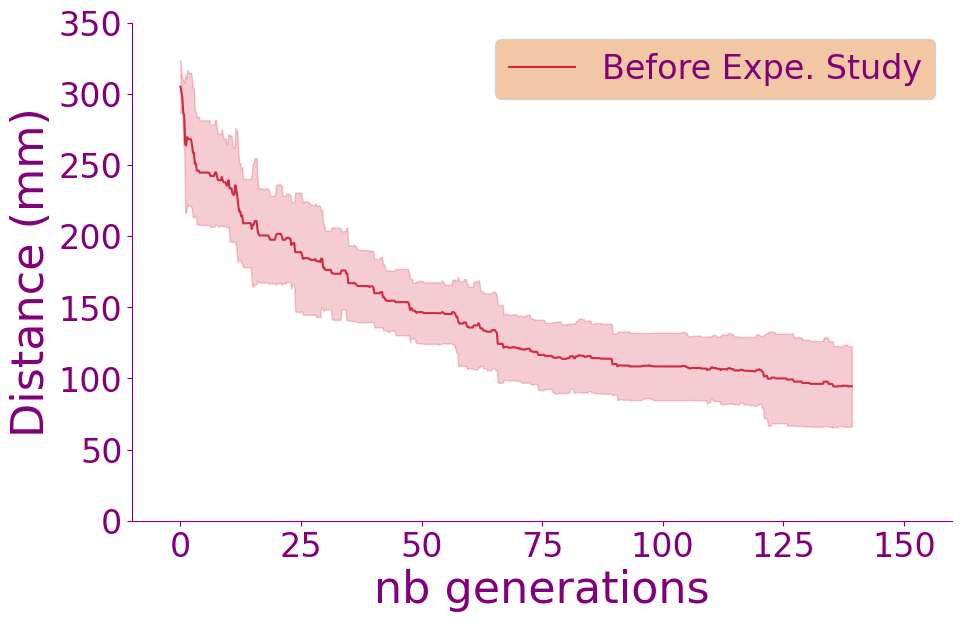

In [9]:
critere_y = "vDistMax"
critere_x = "Gen"
l_keys_used =[
    "360R - 180SR"]

label_used_here = {key : key for key in l_keys_used}
label_used_here["7200"] = "After Expe. Study"
label_used_here["360R - 180SR"] = "Before Expe. Study"
variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))
plt.ylim(top=350, bottom=0)

max_wanted = False
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


classic_format()

ax = plt.gca()
colorAxe1 = "#EEBB8C"
colorAxe2 = "#820079"
ax.spines['bottom'].set_color(colorAxe2)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe2)
plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe2)
plt.xlabel("nb generations", fontsize=32, color=colorAxe2)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe2)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe2)
plt.subplots_adjust(left=0.16, right=0.98, top=0.98, bottom=0.15)

plt.xlim(left=-10, right=160)
plt.savefig('results/experimentalStudyDist1_0.png', format="png", dpi=100, transparent=True)


for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_df_es1[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df_es1[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index], alpha=0.8, label=label_used_here[key])
    print(label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index],  alpha=0.2)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index],  alpha=0.2)

classic_format()

ax = plt.gca()
colorAxe1 = "#EEBB8C"
colorAxe2 = "#820079"
ax.spines['bottom'].set_color(colorAxe2)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe2)
plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe2)
plt.xlabel("nb generations", fontsize=32, color=colorAxe2)
plt.ylim(top=350, bottom=0)
plt.legend(fontsize=24, facecolor=colorAxe1, labelcolor=colorAxe2, loc='upper right')
plt.tick_params(axis='x', labelsize=24, colors=colorAxe2)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe2)
plt.subplots_adjust(left=0.16, right=0.98, top=0.98, bottom=0.15)

plt.xlim(left=-10, right=160)
plt.savefig('results/experimentalStudyDist1_1.png', format="png", dpi=100, transparent=True)

plt.show()


Before Expe. Study - Min=94.33
After Expe. Study - Min=38.80


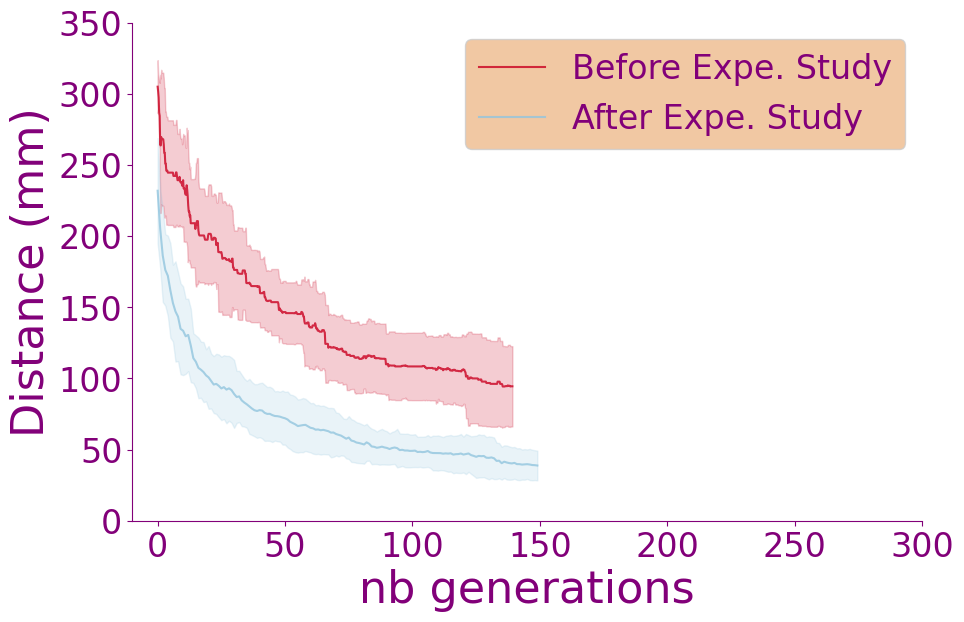

In [10]:
critere_y = "vDistMax"
critere_x = "Gen"

label_used_here = {key : key for key in l_keys_used}
label_used_here["7200"] = "After Expe. Study"
label_used_here["360R - 180SR"] = "Before Expe. Study"
variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))

max_wanted = False
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")


l_keys_used =[
    "360R - 180SR"]
for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_df_es1[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df_es1[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index], alpha=0.8, label=label_used_here[key])
    print(label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index],  alpha=0.2)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index],  alpha=0.2)


l_keys_used = ["7200"]
for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_df_es2[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df_es2[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index+2], alpha=0.8, label=label_used_here[key])
    print(label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index+2],  alpha=0.2)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index+2],  alpha=0.2)



classic_format()

ax = plt.gca()
colorAxe1 = "#EEBB8C"
colorAxe2 = "#820079"
ax.spines['bottom'].set_color(colorAxe2)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe2)
plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe2)
plt.xlabel("nb generations", fontsize=32, color=colorAxe2)
plt.ylim(top=350, bottom=0)
plt.legend(fontsize=24, facecolor=colorAxe1, labelcolor=colorAxe2, loc='upper right')
plt.tick_params(axis='x', labelsize=24, colors=colorAxe2)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe2)
plt.subplots_adjust(left=0.16, right=0.98, top=0.98, bottom=0.15)

plt.xlim(left=-10, right=160)
plt.savefig('results/experimentalStudyDist2_1.png', format="png", dpi=100, transparent=True)

plt.subplots_adjust(left=0.16, right=0.95, top=0.98, bottom=0.15)

plt.xlim(left=-10, right=300)
plt.savefig('results/experimentalStudyDist2_2.png', format="png", dpi=100, transparent=True)
plt.show()


Before Expe. Study - Min=94.33
After Expe. Study - Min=28.61


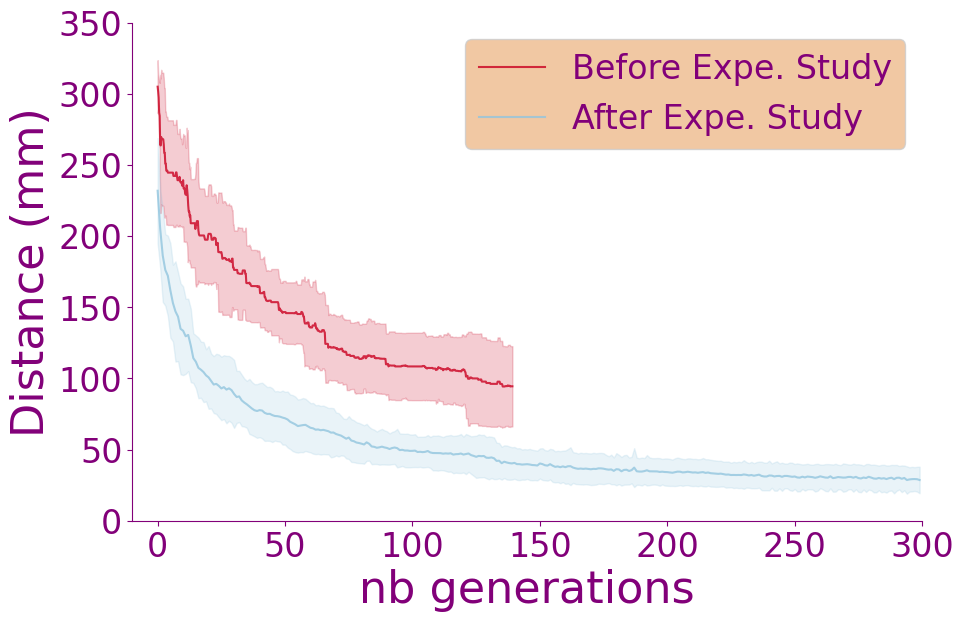

In [11]:
critere_y = "vDistMax"
critere_x = "Gen"

label_used_here = {key : key for key in l_keys_used}
label_used_here["7200"] = "After Expe. Study"
label_used_here["360R - 180SR"] = "Before Expe. Study"
label_used_here["1st Problem"] = "After Expe. Study"
variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))

max_wanted = False
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")
l_keys_used =[
    "360R - 180SR"]
for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_df_es1[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df_es1[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index], alpha=0.8, label=label_used_here[key])
    print(label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index],  alpha=0.2)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index],  alpha=0.2)


l_keys_used = ["1st Problem"]
for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_df_es2[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_df_es2[key]], axis=1)


    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index+2], alpha=0.8, label=label_used_here[key])
    print(label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index+2],  alpha=0.2)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index+2],  alpha=0.2)




classic_format()

ax = plt.gca()
colorAxe1 = "#EEBB8C"
colorAxe2 = "#820079"
ax.spines['bottom'].set_color(colorAxe2)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe2)
plt.ylim(top=0, bottom=-350)
plt.xlim(left=-10, right=300)
plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe2)
plt.xlabel("nb generations", fontsize=32, color=colorAxe2)
plt.ylim(top=350, bottom=0)
plt.legend(fontsize=24, facecolor=colorAxe1, labelcolor=colorAxe2, loc='upper right')
plt.tick_params(axis='x', labelsize=24, colors=colorAxe2)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe2)
plt.subplots_adjust(left=0.16, right=0.95, top=0.98, bottom=0.15)
plt.savefig('results/experimentalStudyDist3.png', format="png", dpi=100, transparent=True)
plt.show()


Loading data of the Soft Actor Critic

In [12]:
path = "Data/multiSAC_"

l_keys = ["SAC 1", "NO", "SAC 2", "NO", "SAC NC", "SAC 16"]
training_sac_df = dict()

for index, key in enumerate(l_keys):
    l_dataframe_sac = []
    if key == "NO":
        continue
    bonus = ""
    if key == "SAC 1":
        bonus = "Save"
    bonus2 = ""
    if key != "SAC 2":
        bonus2 = "/model"
    for i in range(5):
        l_dataframe_sac.append(pd.read_csv(path + str(index) + bonus+"/seed_" + str(i) + bonus2 + "/logsSAC.ods", sep='\s+'))
    training_sac_df[key] = l_dataframe_sac


l_dataframe_sac[0].describe()

,Gen,Tdistance,Treward,Vdistance,Vreward,Success,nbCollis,T_Train,T_Learn,T_valid,T_total
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.500000,143.685431,-21089.414224,141.257155,-20473.497069,0.143017,0.220776,45.730172,24.972414,15.537759,2914.265690
std,33.630343,42.632507,3403.187770,38.253349,2755.731200,0.071252,0.089045,17.201703,9.593212,8.754058,1950.036097
min,0.000000,95.730000,-42156.400000,108.240000,-44198.290000,0.000000,0.000000,25.360000,13.710000,8.680000,43.440000
25%,28.750000,127.500000,-21595.880000,122.770000,-20573.092500,0.100000,0.160000,33.267500,17.975000,9.600000,1329.765000
50%,57.500000,138.315000,-20736.275000,134.820000,-19895.915000,0.150000,0.220000,36.330000,19.760000,10.115000,2601.715000
75%,86.250000,147.787500,-19614.100000,146.480000,-19506.412500,0.190000,0.280000,69.902500,38.420000,28.172500,4238.555000
max,115.000000,413.080000,-17058.120000,444.630000,-18170.500000,0.330000,0.440000,74.380000,41.490000,30.780000,7107.020000


Graph for the Soft Actor Critic

      Classic SAC - Min=7.29
      No Collision - Min=114.16
16 hidden units - Min=96.14


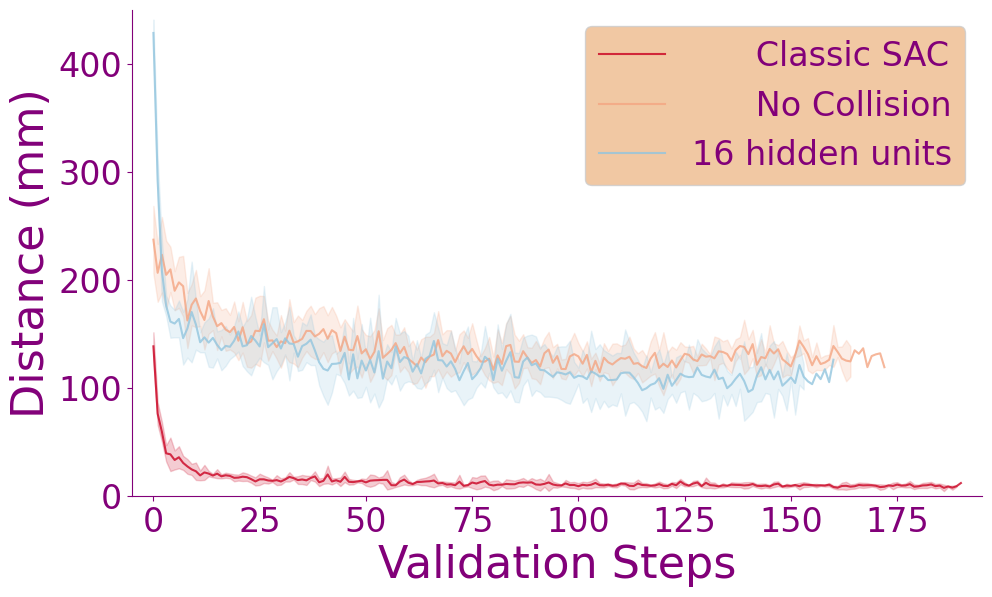

In [13]:


def save(i):
    classic_format()

    ax = plt.gca() 
    colorAxe1 = "#EEBB8C"
    colorAxe2 = "#820079"
    ax.spines['bottom'].set_color(colorAxe2)  # Couleur de l'axe x
    ax.spines['left'].set_color(colorAxe2)
    plt.ylim(top=450, bottom=0)
    plt.xlim(right=195, left=-5)

    plt.xlabel("Validation Steps", fontsize=32, color=colorAxe2)
    plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe2)
    if(i > 0):
        plt.legend(fontsize=24, facecolor=colorAxe1, labelcolor=colorAxe2)
    plt.tick_params(axis='x', labelsize=24, colors=colorAxe2)
    plt.tick_params(axis='y', labelsize=24, colors=colorAxe2)
    plt.subplots_adjust(left=0.13, right=0.98, top=0.96, bottom=0.15)
    plt.savefig('results/SacTraining{}.png'.format(i+1), format="png", dpi=100, transparent=True)


critere_y = "Vdistance"
critere_x = "Gen"
l_keys_used = ["SAC 1", "SAC NC", "SAC 16"]
label_used_here = {key : key for key in l_keys_used}

label_used_here["SAC 1"] = "      Classic SAC"
label_used_here["SAC 2"] = "         RS"
label_used_here["SAC NC"] = "      No Collision"
label_used_here["SAC 16"] = "16 hidden units"
variance_info = True
min_max_info = False

plt.figure(figsize=(10,6))

max_wanted = False
func1, func2, text = (np.amax, np.argmax, "Max") if max_wanted else (np.amin, np.argmin, "Min")

save(0)
for index, key in enumerate(l_keys_used):

    all_values_y = pd.concat([df[critere_y] for df in training_sac_df[key]], axis=1)
    all_values_x = pd.concat([df[critere_x] for df in training_sac_df[key]], axis=1)

    mean_values_y = all_values_y.mean(axis=1)
    mean_values_x = all_values_x.mean(axis=1)
    
    plt.plot(mean_values_x, mean_values_y, color = l_colors[index], alpha=0.8, label=label_used_here[key])
    print(label_used_here[key] + f' - {text}={func1(mean_values_y):.2f}')
    if variance_info:
        plt.fill_between(mean_values_x, mean_values_y - all_values_y.std(axis=1), mean_values_y + all_values_y.std(axis=1), color = l_colors[index],  alpha=0.2)
    elif min_max_info:
        plt.fill_between(mean_values_x, all_values_y.max(axis=1), all_values_y.min(axis=1), color = l_colors[index],  alpha=0.05)
    save(index+1)

plt.show()

Loading the test data

In [14]:


l_keys = []
testing_df = dict()
path = "Data/multiSAC_"
name_keys = ['SAC']

l_keys_c = ['SAC', 'SAC No coll', "SAC Random", "SAC Random No Coll", "SAC NC training", "SAC 16"]
l_keys = l_keys + l_keys_c

for index, key in enumerate(l_keys_c):
    l_dataframe = []
    for i in range(5):
        l_dataframe.append(pd.read_csv(path+str(index)+"/seed_" + str(i) +"/outputSAC.ods", usecols=np.arange(0,17)))
        l_dataframe[-1]["TimeAction"] = l_dataframe[-1]["Duration(micros)"] / l_dataframe[-1]["NbActions"]
        l_dataframe[-1]["RatioGegelati"] = 0
        l_dataframe[-1]["Distance"] = l_dataframe[-1]["Distance*1000"]/1000
        l_dataframe[-1]["Score"] = l_dataframe[-1]["Score*1000"]/1000
        
    testing_df[key] = l_dataframe


l_keys_c = ["TPGs 1", "TPGs 2"]
l_keys = l_keys + l_keys_c

path = "Data/expeStudy2/multiTraining_"

for index, key in enumerate(l_keys_c):
    l_dataframe = []
    index = 6 - index
    for i in range(10):
        
        file = path+str(index)+"/seed_" + str(i) +"/outputGegelati.csv"
        l_dataframe.append(pd.read_csv(file, usecols=np.arange(0,17)))
        l_dataframe[-1]["TimeAction"] = l_dataframe[-1]["Duration(micros)"] / l_dataframe[-1]["NbActions"]
        l_dataframe[-1]["RatioGegelati"] = 1
        l_dataframe[-1]["Distance"] = l_dataframe[-1]["Distance*1000"]/1000
        l_dataframe[-1]["Score"] = l_dataframe[-1]["Score*1000"]/1000
        
    testing_df[key] = l_dataframe


l_keys_c = ["Hybrid 2", "Hybrid 1"]
l_keys = l_keys + l_keys_c

path = "Data/multiHybride_"

for index, key in enumerate(l_keys_c):
    l_dataframe = []
    for i in range(50):

        if index==1:
            keyConf = "nbMili_{}_nbIt_{}".format(20, 100)
        else:
            keyConf = "nbMili_{}_nbIt_{}".format(10, 100)
        
        l_dataframe.append(pd.read_csv(path+str(index+2)+"/seed_" + str(i) +"/" + keyConf + "/outputGegelati.csv", sep=',', usecols=np.arange(0,17)))
        l_dataframe[-1]["RatioGegelati"] = l_dataframe[-1]["NbIterationGegelati"] / l_dataframe[-1]["NbActions"]
        #l_dataframe[-1]["TimeAction"] =  (1 - l_dataframe[-1]["RatioGegelati"]) * 81.396847 + l_dataframe[-1]["RatioGegelati"] * 0.93838915
        l_dataframe[-1]["TimeAction"] = l_dataframe[-1]["Duration(micros)"] / l_dataframe[-1]["NbActions"] / 2
        l_dataframe[-1]["Distance"] = l_dataframe[-1]["Distance*1000"]/1000
        l_dataframe[-1]["Score"] = l_dataframe[-1]["Score*1000"]/1000
        
    testing_df[key] = l_dataframe

print(testing_df.keys())

l_dataframe[-1].describe()

dict_keys(['SAC', 'SAC No coll', 'SAC Random', 'SAC Random No Coll', 'SAC NC training', 'SAC 16', 'TPGs 1', 'TPGs 2', 'Hybrid 2', 'Hybrid 1'])


,armPos0,armPos1,armPos2,armPos3,armPos4,armPos5,targetPos0,targetPos1,targetPos2,Duration(micros),...,Distance*1000,Success,Collision,NbActions,NbIterationGegelati,MotorPos,RatioGegelati,TimeAction,Distance,Score
count,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.00000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2048.0,2048.0,2048.0,2048.0,512.0,256.0,21.490000,-20.43000,240.820000,2283.570000,...,12917.620000,0.820000,0.180000,708.670000,679.860000,2048.090000,0.963977,1.482164,12.917620,-5.671040
std,0.0,0.0,0.0,0.0,0.0,0.0,196.750752,202.21457,128.555328,5832.055291,...,27985.821075,0.386123,0.386123,240.778789,224.822939,1.504841,0.091968,2.827729,27.985821,42.651794
min,2048.0,2048.0,2048.0,2048.0,512.0,256.0,-402.000000,-408.00000,38.000000,135.000000,...,1878.000000,0.000000,0.000000,193.000000,193.000000,2045.000000,0.560788,0.301402,1.878000,-160.443000
25%,2048.0,2048.0,2048.0,2048.0,512.0,256.0,-127.750000,-158.50000,132.750000,452.250000,...,2589.750000,1.000000,0.000000,517.250000,512.000000,2048.000000,1.000000,0.332129,2.589750,-19.708250
50%,2048.0,2048.0,2048.0,2048.0,512.0,256.0,27.000000,-31.50000,220.500000,566.500000,...,2805.000000,1.000000,0.000000,685.500000,662.000000,2048.000000,1.000000,0.356915,2.805000,18.310000
75%,2048.0,2048.0,2048.0,2048.0,512.0,256.0,168.500000,141.75000,351.000000,729.250000,...,2934.500000,1.000000,0.000000,878.500000,851.250000,2048.000000,1.000000,0.425379,2.934500,20.540000
max,2048.0,2048.0,2048.0,2048.0,512.0,256.0,412.000000,435.00000,536.000000,37647.000000,...,160443.000000,1.000000,1.000000,1552.000000,1136.000000,2051.000000,1.000000,13.873800,160.443000,25.170000


Comparison between SAC and TPGs

Mean Time SAC: 61.050799043401405 µs -- Mean Time TPGs: 0.6367760818134275 µs -- Time SAC / Time TPGs: 95.87483070899798, timeHyb 2.7656130328680533 - 53.96439930948053


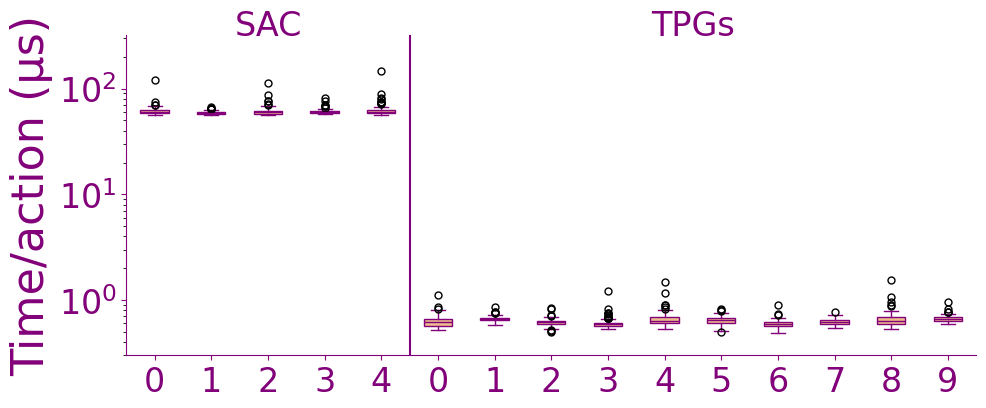

In [15]:
# Création du graphique
colorAxe1 = "#EEBB8C"
colorAxe2 = "#820079"
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.boxplot([df_sac["TimeAction"] for df_sac in testing_df["SAC"]] +  [df_gegelati["TimeAction"] for df_gegelati in testing_df["TPGs 1"]],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor=colorAxe1, color=colorAxe2),  # Couleur des boîtes
            whiskerprops=dict(color=colorAxe2),  # Couleur des whiskers
            capprops=dict(color=colorAxe2),  # Couleur des caps
            medianprops=dict(color=colorAxe2),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )
ax1.set_yscale('log') 
# Labels et titre

meanTimeSac = np.mean([df_sac["TimeAction"] for df_sac in testing_df["SAC"]])
meanTimeSac16 = np.mean([df_sac["TimeAction"] for df_sac in testing_df["SAC 16"]])
meanTimeTPGs = np.mean([df_sac["TimeAction"] for df_sac in testing_df["TPGs 1"]])
meanTimeHybrid = np.mean([df_sac["TimeAction"] for df_sac in testing_df["Hybrid 1"]])
print("Mean Time SAC: {} µs -- Mean Time TPGs: {} µs -- Time SAC / Time TPGs: {}, timeHyb {} - {}".format(
    meanTimeSac, meanTimeTPGs, meanTimeSac/meanTimeTPGs, meanTimeHybrid, meanTimeSac16
))
    

ax1.text(3, 320, "SAC", fontsize=24, color=colorAxe2, horizontalalignment='center')
ax1.text(10.5, 320, "TPGs", fontsize=24, color=colorAxe2, horizontalalignment='center')

ax1.plot(np.ones(320)*5.5, np.arange(320), color=colorAxe2)
classic_format()


ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe2)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe2)
plt.ylim(0.3, 320)

plt.xticks(range(1,16), list(range(5)) + list(range(10)))
plt.yticks(color=colorAxe2)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe2)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe2)
plt.ylabel("Time/action (µs)", fontsize=32, color=colorAxe2)
plt.subplots_adjust(left=0.13, right=0.98, top=0.90, bottom=0.10)
plt.savefig('results/boxPlotTimeActionTPG_SAC.png', format="png", dpi=100, transparent=True)
# Affichage du graphique
plt.show()

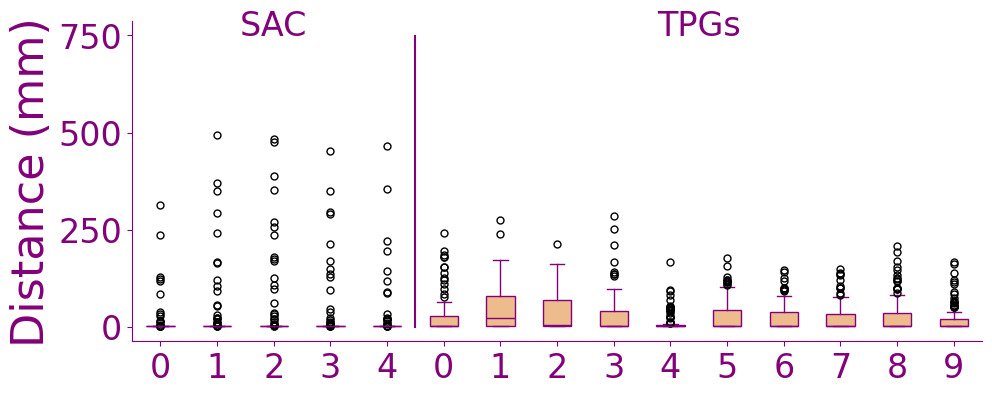

In [16]:
# Création du graphique
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)
colorAxe1 = "#EEBB8C"
colorAxe2 = "#820079"

ax1.boxplot([df_sac["Distance"] for df_sac in testing_df["SAC"]] +  [df_gegelati["Distance"] for df_gegelati in testing_df["TPGs 1"]],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor=colorAxe1, color=colorAxe2),  # Couleur des boîtes
            whiskerprops=dict(color=colorAxe2),  # Couleur des whiskers
            capprops=dict(color=colorAxe2),  # Couleur des caps
            medianprops=dict(color=colorAxe2),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )
    

ax1.text(3, 750, "SAC", fontsize=24, color=colorAxe2, horizontalalignment='center')
ax1.text(10.5, 750, "TPGs", fontsize=24, color=colorAxe2, horizontalalignment='center')

ax1.plot(np.ones(750)*5.5, np.arange(750), color=colorAxe2)

classic_format()


ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe2)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe2)

plt.xticks(range(1,16), list(range(5)) + list(range(10)))
plt.yticks(color=colorAxe2)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe2)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe2)
plt.ylabel("Distance (mm)", fontsize=32, color=colorAxe2)
plt.subplots_adjust(left=0.13, right=0.98, top=0.90, bottom=0.10)
plt.savefig('results/boxPlotDistanceTPG_SAC.png', format="png", dpi=100, transparent=True)
# Affichage du graphique
plt.show()

Loading all Hybrid configurations

In [17]:
l_keys = ["Hybrid"]

path = "Data/multiHybride_"

lNbMili = [1, 3, 10, 20, 100, 10000]
lNbIt = [1, 5, 10, 50, 100, 1000]

hybridDF1 = dict()

for nbMili in lNbMili:
    for nbIt in lNbIt:

        key = "nbMili_{}_nbIt_{}".format(nbMili, nbIt)
        
        

        l_dataframe = []
        index = 0
        for i in range(50):
            l_dataframe.append(pd.read_csv(path+str(index)+"/seed_" + str(i) +"/" + key + "/outputGegelati.csv", sep=',', usecols=np.arange(0,17)))
            l_dataframe[-1]["RatioGegelati"] = l_dataframe[-1]["NbIterationGegelati"] / l_dataframe[-1]["NbActions"]
            l_dataframe[-1]["TheoricalTimeAction"] =  (1 - l_dataframe[-1]["RatioGegelati"]) * 61.53 + l_dataframe[-1]["RatioGegelati"] * 0.64
            l_dataframe[-1]["TimeAction"] = l_dataframe[-1]["Duration(micros)"] / l_dataframe[-1]["NbActions"] / 2
            l_dataframe[-1]["Distance"] = l_dataframe[-1]["Distance*1000"]/1000
            l_dataframe[-1]["Score"] = l_dataframe[-1]["Score*1000"]/1000
            
        hybridDF1[key] = l_dataframe



l_dataframe[-1].describe()

,armPos0,armPos1,armPos2,armPos3,armPos4,armPos5,targetPos0,targetPos1,targetPos2,Duration(micros),...,Success,Collision,NbActions,NbIterationGegelati,MotorPos,RatioGegelati,TheoricalTimeAction,TimeAction,Distance,Score
count,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.00000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2048.0,2048.0,2048.0,2048.0,512.0,256.0,21.490000,-20.43000,240.820000,4831.160000,...,0.780000,0.21000,707.000000,686.110000,2048.090000,0.969308,2.508819,3.329973,16.225840,-26.413260
std,0.0,0.0,0.0,0.0,0.0,0.0,196.750752,202.21457,128.555328,17179.222631,...,0.416333,0.40936,238.761493,230.184594,1.504841,0.098096,5.973050,7.693369,34.860762,114.042875
min,2048.0,2048.0,2048.0,2048.0,512.0,256.0,-402.000000,-408.00000,38.000000,289.000000,...,0.000000,0.00000,193.000000,171.000000,2045.000000,0.440722,0.640000,0.461014,1.749000,-956.606000
25%,2048.0,2048.0,2048.0,2048.0,512.0,256.0,-127.750000,-158.50000,132.750000,1116.750000,...,1.000000,0.00000,519.750000,518.000000,2048.000000,1.000000,0.640000,0.727256,2.546500,-33.817500
50%,2048.0,2048.0,2048.0,2048.0,512.0,256.0,27.000000,-31.50000,220.500000,1562.500000,...,1.000000,0.00000,696.500000,685.500000,2048.000000,1.000000,0.640000,1.055264,2.806500,18.155000
75%,2048.0,2048.0,2048.0,2048.0,512.0,256.0,168.500000,141.75000,351.000000,2173.500000,...,1.000000,0.00000,866.250000,858.500000,2048.000000,1.000000,0.640000,1.354885,2.968750,20.540000
max,2048.0,2048.0,2048.0,2048.0,512.0,256.0,412.000000,435.00000,536.000000,162565.000000,...,1.000000,1.00000,1710.000000,1136.000000,2051.000000,1.000000,34.694459,47.533626,167.087000,25.170000


Printing the pareto front

C:\Users\qvacher\AppData\Local\Temp\ipykernel_27256\2530008991.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,100)


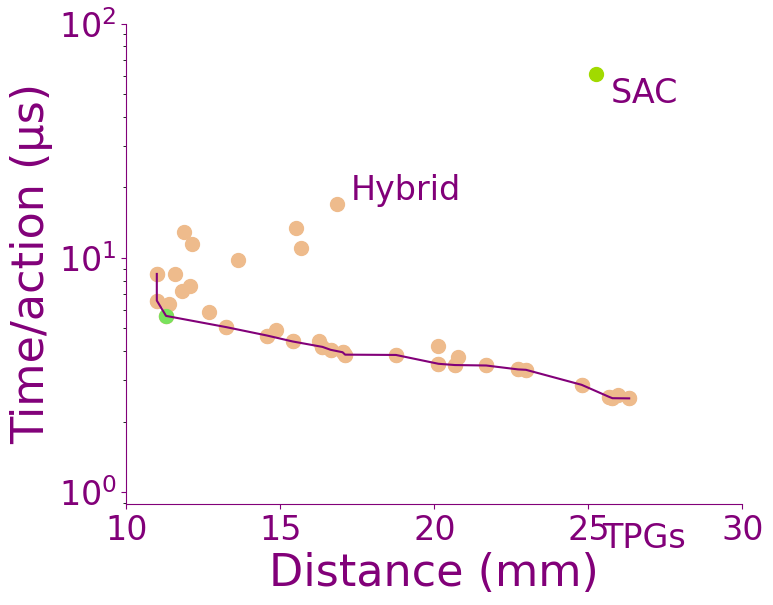

In [18]:
def save(i):
    classic_format()
    ax = plt.gca()
    ax.set_yscale('log') 
    ax.spines['bottom'].set_color(colorAxe2)  # Couleur de l'axe x
    ax.spines['left'].set_color(colorAxe2)
    plt.xlim(10,30)
    plt.ylim(0,100)
    plt.xticks(color=colorAxe2)
    plt.yticks(color=colorAxe2)
    plt.tick_params(axis='x', labelsize=24, colors=colorAxe2)
    plt.tick_params(axis='y', labelsize=24, colors=colorAxe2)
    plt.ylabel("Time/action (µs)", fontsize=32, color=colorAxe2)
    plt.xlabel("Distance (mm)", fontsize=32, color=colorAxe2)
    plt.subplots_adjust(left=0.20, right=0.97, top=0.95, bottom=0.15)
    plt.savefig('results/paretoFrontHybrid{}.png'.format(i), format="png", dpi=100, transparent=True)

critere_x = "Distance"
critere_y = "TheoricalTimeAction"


fig = plt.figure(figsize=(8,6))

colorAxe1 = "#EEBB8C"
colorAxe2 = "#820079"
sizeDot = 100

l_colors[3] = "purple"

sizeMili = {
    "1": 50,
    "3": 100,
    "10": 150,
    "20": 50,
    "100": 100,
    "10000": 150,
}
shapeMili = {
    "1": "+",
    "3": "+",
    "10": "+",
    "20": "x",
    "100": "x",
    "10000": "x",
}

colorIt = {
    "1": "blue",
    "5": "red",
    "10": "green",
    "50": "orange",
    "100": "black",
    "1000": "pink",
}

nullitéMoche = True
if nullitéMoche:
    for key in sizeMili:
        sizeMili[key] = 50
    for key in shapeMili:
        shapeMili[key] = "o"
    for key in colorIt:
        colorIt[key] = colorAxe1

l_points = []
specialPoints = []


save(0)
data_x = pd.concat([df[critere_x] for df in testing_df["TPGs 1"]]).mean()
data_y = pd.concat([df["TimeAction"] for df in testing_df["TPGs 1"]]).mean()
plt.scatter(data_x, data_y, color="#50EABA", alpha=1, s=sizeDot, zorder = 0, marker="o")
plt.text(data_x - 3.1, data_y-0.06, "TPGs", fontsize=24, color=colorAxe2)


data_x = pd.concat([df[critere_x] for df in testing_df["SAC"]]).mean()
data_y = pd.concat([df["TimeAction"] for df in testing_df["SAC"]]).mean()
plt.scatter(data_x, data_y, color="#A1DA00", alpha=1, s=sizeDot, zorder = 0, marker="o")
plt.text(data_x +0.5, data_y-15, "SAC", fontsize=24, color=colorAxe2)
save(1)

for index, key in enumerate(hybridDF1):

    dataKey = key.split("_")

    data_tpgs_x = pd.concat([df[critere_x] for df in hybridDF1[key]]).mean()
    data_tpgs_y = pd.concat([df[critere_y] for df in hybridDF1[key]]).mean()
        


    if key == "nbMili_{}_nbIt_{}".format(20, 100):
        specialPoints.append([data_tpgs_x, data_tpgs_y])
        plt.text(data_tpgs_x + 6, data_tpgs_y+12, "Hybrid", fontsize=24, color=colorAxe2)

    
    plt.scatter(data_tpgs_x, data_tpgs_y, color=colorIt[dataKey[3]], alpha=1, s=sizeDot, zorder = 0, marker=shapeMili[dataKey[1]])
    if "nbIt_10000" in key:
        plt.text(data_tpgs_x, data_tpgs_y, key)
    l_points.append([data_tpgs_x, data_tpgs_y])


save(2)


l_points = np.array(l_points)
pareto_points = []
for i, point in enumerate(l_points):
    # Vérifier si le point est dominé par un autre point
    dominated = False
    for j, other_point in enumerate(l_points):
        if i != j and all(other_point <= point) and any(other_point < point):
            dominated = True
            break
    if not dominated:
        pareto_points.append(point)


pareto_points = np.array(pareto_points)
pareto_points = pareto_points[np.lexsort((pareto_points[:, 1], pareto_points[:, 0]))]
plt.scatter(pareto_points[:, 0], pareto_points[:, 1], color=colorAxe1, s=sizeDot)
plt.plot(pareto_points[:, 0], pareto_points[:, 1], color=colorAxe2)

save(3)

plt.scatter(specialPoints[0][0], specialPoints[0][1], color='#79E25D', s=sizeDot)

save(4)






# Affichage du graphique
plt.show()
    

Comparison Between SAC and Hybrid solution

Mean Time SAC: 61.050799043401405 µs -- Mean Time TPGs: 0.6367760818134275 µs -- Time SAC / Time TPGs: 95.87483070899798, timeHyb 2.7656130328680533 - 53.96439930948053


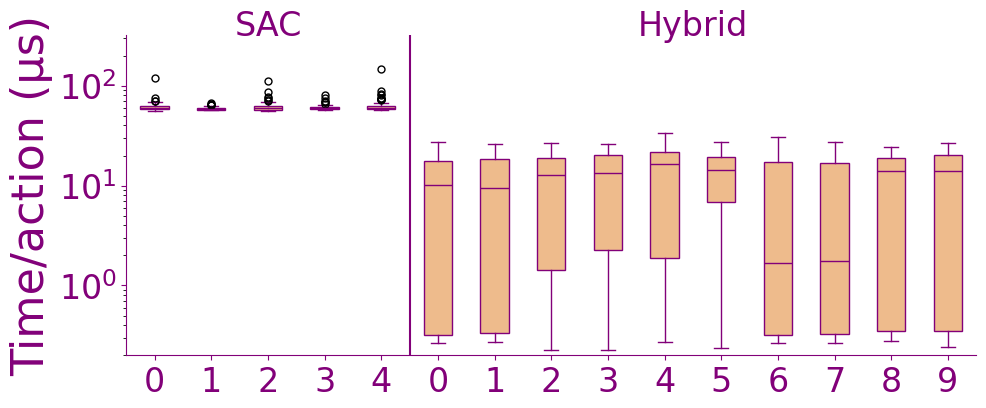

In [19]:
idWanted = [0, 1, 12, 13, 24, 25, 36, 37, 48, 49]
dfTaken = []

for id in idWanted:
    dfTaken.append(testing_df["Hybrid 2"][id])

# Création du graphique
colorAxe1 = "#EEBB8C"
colorAxe2 = "#820079"
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.boxplot([df_sac["TimeAction"] for df_sac in testing_df["SAC"]] +  [df_gegelati["TimeAction"] for df_gegelati in dfTaken],
                            patch_artist=True,  # Pour remplir les boîtes avec des couleurs
            boxprops=dict(facecolor=colorAxe1, color=colorAxe2),  # Couleur des boîtes
            whiskerprops=dict(color=colorAxe2),  # Couleur des whiskers
            capprops=dict(color=colorAxe2),  # Couleur des caps
            medianprops=dict(color=colorAxe2),  # Couleur des médianes
            flierprops=dict(marker='o', markersize=5, linestyle='')  # Couleur des outliers
    )
ax1.set_yscale('log') 
# Labels et titre

meanTimeSac = np.mean([df_sac["TimeAction"] for df_sac in testing_df["SAC"]])
meanTimeSac16 = np.mean([df_sac["TimeAction"] for df_sac in testing_df["SAC 16"]])
meanTimeTPGs = np.mean([df_sac["TimeAction"] for df_sac in testing_df["TPGs 1"]])
meanTimeHybrid = np.mean([df_sac["TimeAction"] for df_sac in testing_df["Hybrid 1"]])
print("Mean Time SAC: {} µs -- Mean Time TPGs: {} µs -- Time SAC / Time TPGs: {}, timeHyb {} - {}".format(
    meanTimeSac, meanTimeTPGs, meanTimeSac/meanTimeTPGs, meanTimeHybrid, meanTimeSac16
))
    

ax1.text(3, 320, "SAC", fontsize=24, color=colorAxe2, horizontalalignment='center')
ax1.text(10.5, 320, "Hybrid", fontsize=24, color=colorAxe2, horizontalalignment='center')

ax1.plot(np.ones(320)*5.5, np.arange(320), color=colorAxe2)
classic_format()


ax = plt.gca()
ax.spines['bottom'].set_color(colorAxe2)  # Couleur de l'axe x
ax.spines['left'].set_color(colorAxe2)
plt.ylim(0.2, 320)

plt.xticks(range(1,16), list(range(5)) + list(range(10)))
plt.yticks(color=colorAxe2)
plt.tick_params(axis='x', labelsize=24, colors=colorAxe2)
plt.tick_params(axis='y', labelsize=24, colors=colorAxe2)
plt.ylabel("Time/action (µs)", fontsize=32, color=colorAxe2)
plt.subplots_adjust(left=0.13, right=0.98, top=0.90, bottom=0.10)
plt.savefig('results/boxPlotTimeActionHybrid_SAC.png', format="png", dpi=100, transparent=True)
# Affichage du graphique
plt.show()

Comparison between TPGs, SAC and hybrid solution

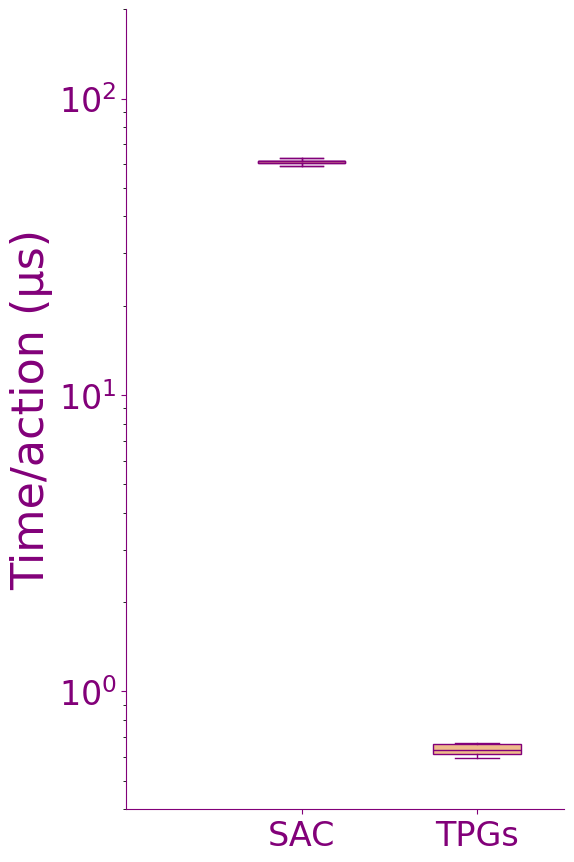

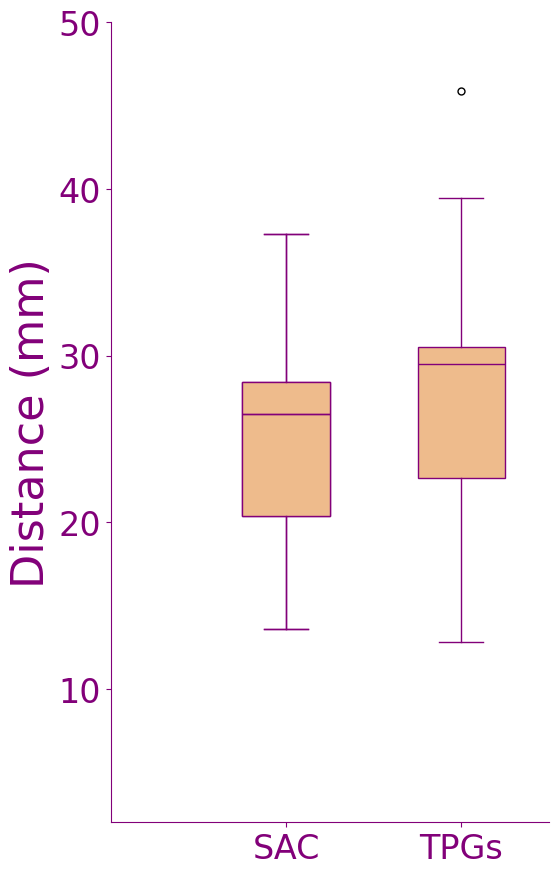

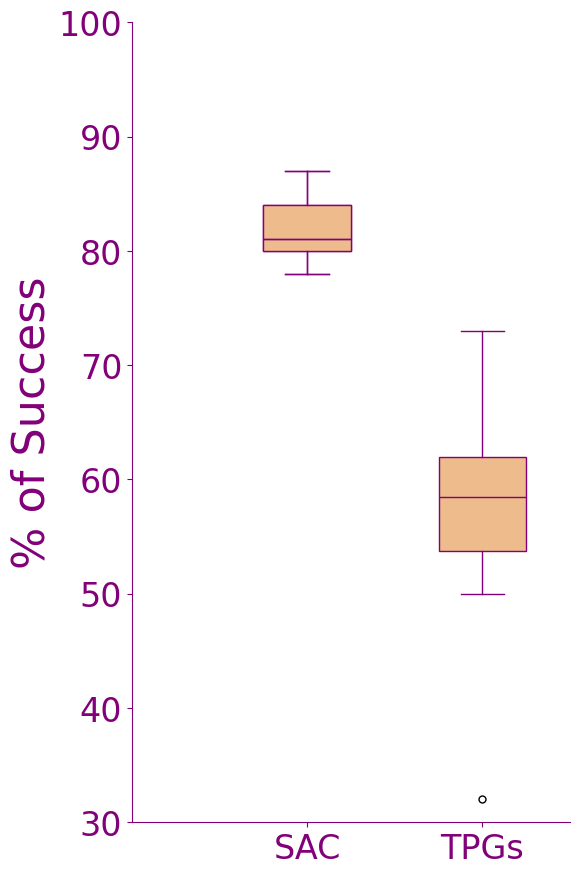

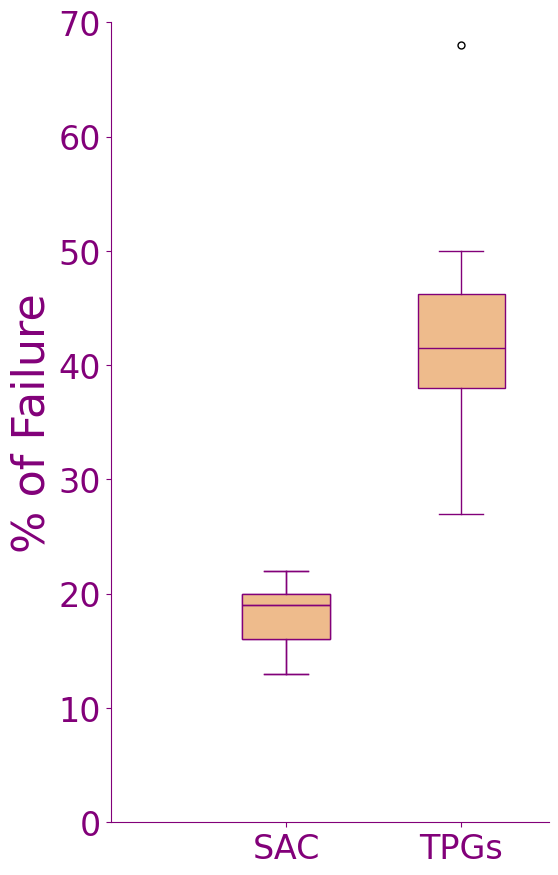

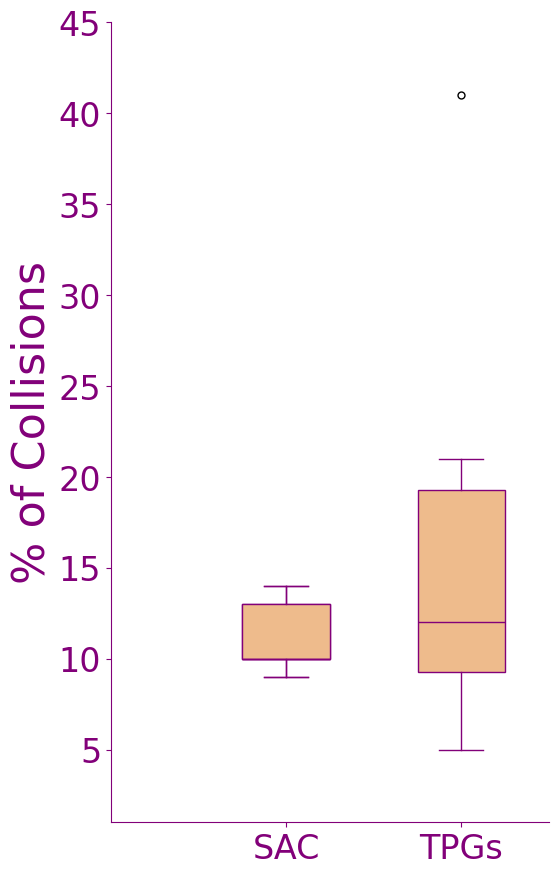

In [20]:
idWanted = np.arange(50)
dfTaken = []

criteres_and_legends = [
    ["TimeAction", "Time/action (µs)", "log", 0.4, 200, 1], 
    ["Distance", "Distance (mm)", "linear", 2, 50, 1],
    ["Success", "% of Success", "linear", 0.3*100, 1*100, 100],
    ["Success", "% of Failure", "linear", 0*100, 0.7*100, 100],
    ["Collision", "% of Collisions", "linear", 0.01*100, 0.45*100, 100]]

for critere_and_legend in criteres_and_legends:
    critere = critere_and_legend[0]
    legend = critere_and_legend[1]
    y_scale = critere_and_legend[2]
    limDown = critere_and_legend[3]
    limUp = critere_and_legend[4]

    # Création du graphique
    colorAxe1 = "#EEBB8C"
    colorAxe2 = "#820079"

    multiplier = critere_and_legend[5] # 100 for %
    

    
    if legend == "% of Failure":
        data_1 = [(1-df_sac[critere].mean())*multiplier for df_sac in testing_df["SAC"]]
        data_2 = [(1-df_gegelati[critere].mean())*multiplier for df_gegelati in testing_df["TPGs 1"]]
    else:
        data_1 = [df_sac[critere].mean()*multiplier for df_sac in testing_df["SAC"]]
        data_2 = [df_gegelati[critere].mean()*multiplier for df_gegelati in testing_df["TPGs 1"]]

    

    fig = plt.figure(figsize=(6, 10))
    ax1 = fig.add_subplot(1, 1, 1)
    l_data = [data_1, data_2]

        

    for j in range(len(l_data)+1):
        ax1.boxplot(l_data[:j],
                                    patch_artist=True,  # Pour remplir les boîtes avec des couleurs
                    boxprops=dict(facecolor=colorAxe1, color=colorAxe2),  # Couleur des boîtes
                    whiskerprops=dict(color=colorAxe2),  # Couleur des whiskers
                    capprops=dict(color=colorAxe2),  # Couleur des caps
                    medianprops=dict(color=colorAxe2),  # Couleur des médianes
                    flierprops=dict(marker='o', markersize=5, linestyle=''),
                    widths=0.5
                      # Couleur des outliers
            )
        ax1.set_yscale(y_scale) 
        plt.ylim(limDown,limUp)
        # Labels et titre
            

        classic_format()


        ax = plt.gca()
        ax.spines['bottom'].set_color(colorAxe2)  # Couleur de l'axe x
        ax.spines['left'].set_color(colorAxe2)

        plt.xticks(range(1,4), ["SAC", "TPGs", ""])
        plt.xlim(0,2.5)
        plt.yticks(color=colorAxe2)
        plt.tick_params(axis='x', labelsize=24, colors=colorAxe2)
        plt.tick_params(axis='y', labelsize=24, colors=colorAxe2)
        plt.ylabel(legend, fontsize=32, color=colorAxe2)
        plt.subplots_adjust(left=0.25, right=0.98, top=0.90, bottom=0.10)
        used_critere = critere if legend != "% of Failure" else "Failure"
        plt.savefig('results/bpSACNCi/boxPlotNewShape{}_{}.png'.format(used_critere, j), format="png", dpi=100, transparent=True)
    # Affichage du graphique


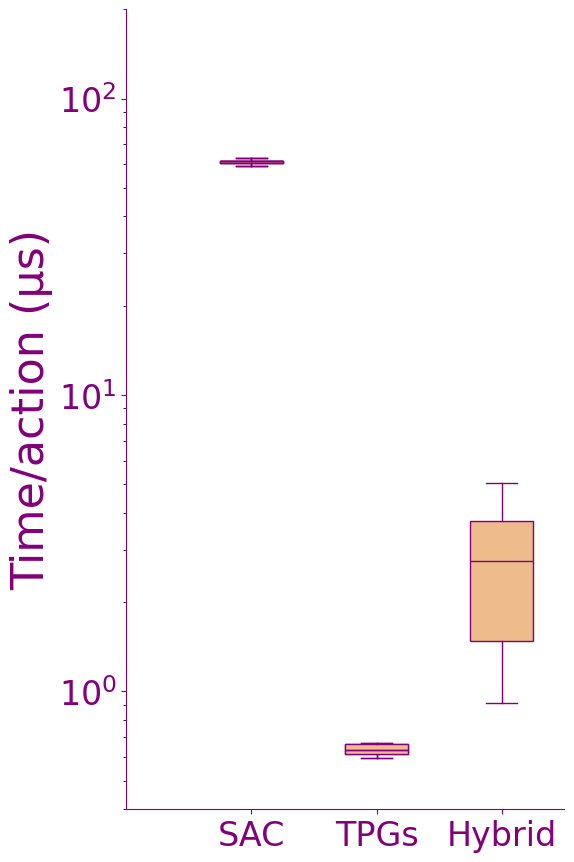

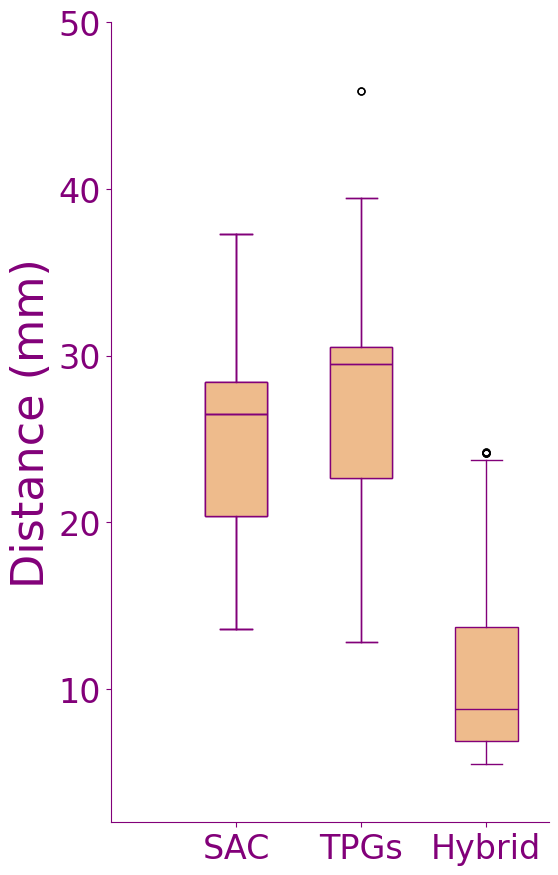

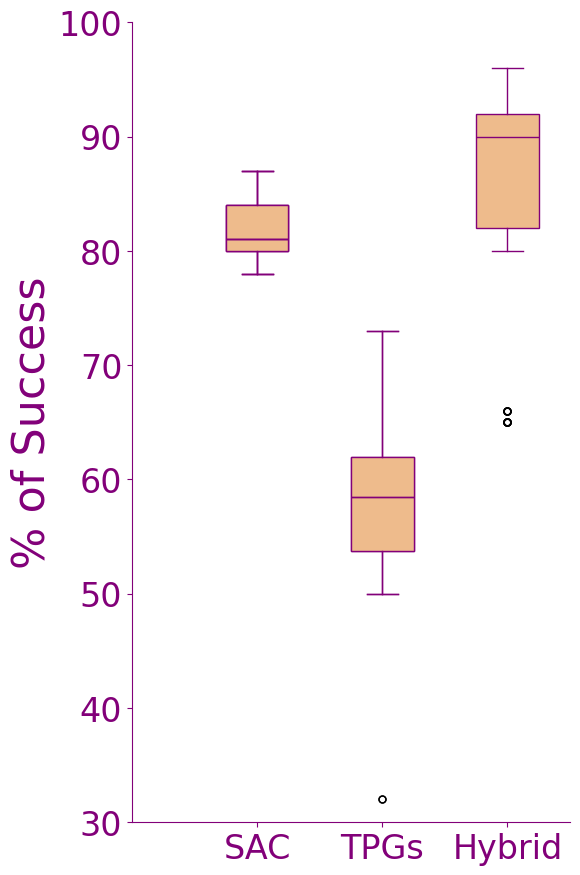

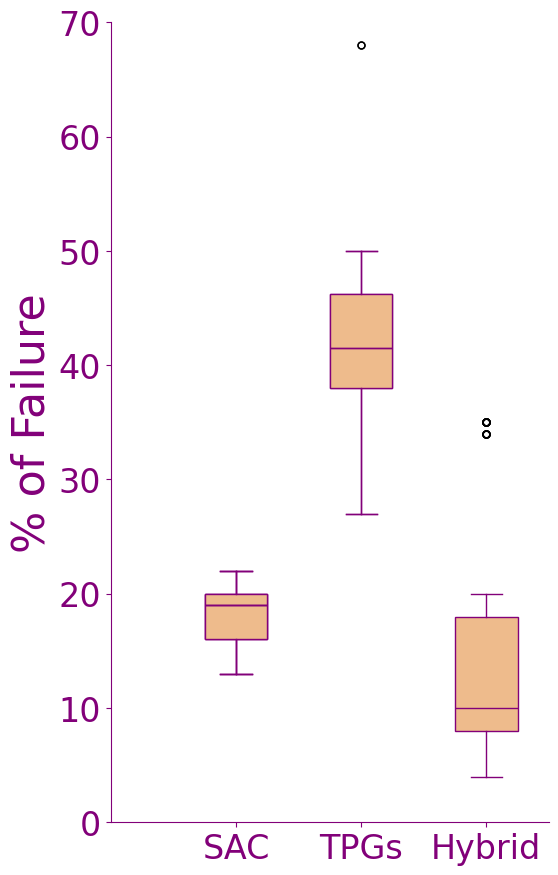

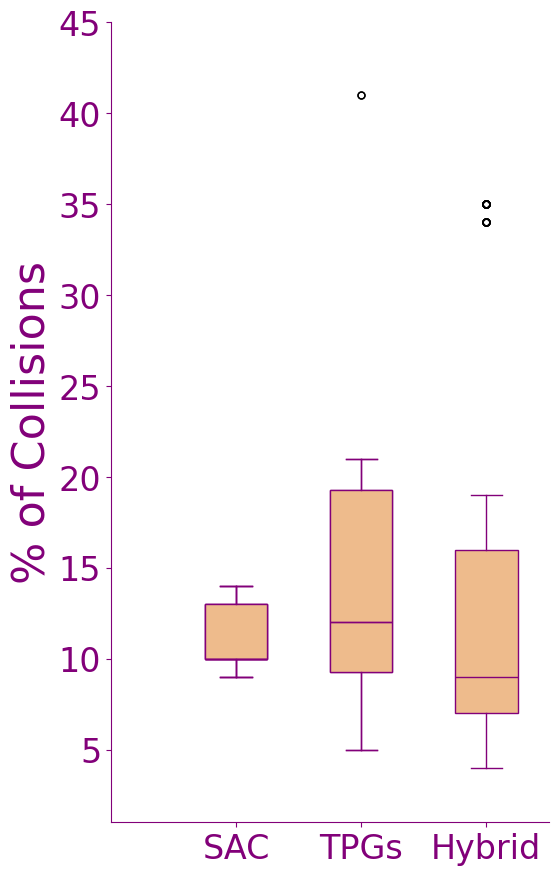

In [21]:
idWanted = np.arange(50)
dfTaken = []

criteres_and_legends = [
    ["TimeAction", "Time/action (µs)", "log", 0.4, 200, 1], 
    ["Distance", "Distance (mm)", "linear", 2, 50, 1],
    ["Success", "% of Success", "linear", 0.3*100, 1*100, 100],
    ["Success", "% of Failure", "linear", 0*100, 0.7*100, 100],
    ["Collision", "% of Collisions", "linear", 0.01*100, 0.45*100, 100]]

for critere_and_legend in criteres_and_legends:
    critere = critere_and_legend[0]
    legend = critere_and_legend[1]
    y_scale = critere_and_legend[2]
    limDown = critere_and_legend[3]
    limUp = critere_and_legend[4]

    for id in idWanted:
        dfTaken.append(testing_df["Hybrid 1"][id])
    # Création du graphique
    colorAxe1 = "#EEBB8C"
    colorAxe2 = "#820079"

    multiplier = critere_and_legend[5] # 100 for %
    
    if legend == "% of Failure":
        data_1 = [(1-df_sac[critere].mean())*multiplier for df_sac in testing_df["SAC"]]
        data_2 = [(1-df_gegelati[critere].mean())*multiplier for df_gegelati in testing_df["TPGs 1"]]
        data_3 = [(1-df_gegelati[critere].mean())*multiplier for df_gegelati in dfTaken]

    else:
        data_1 = [df_sac[critere].mean()*multiplier for df_sac in testing_df["SAC"]]
        data_2 = [df_gegelati[critere].mean()*multiplier for df_gegelati in testing_df["TPGs 1"]]
        data_3 = [df_gegelati[critere].mean()*multiplier for df_gegelati in dfTaken]

    fig = plt.figure(figsize=(6, 10))
    ax1 = fig.add_subplot(1, 1, 1)
    l_data = [data_1, data_2, data_3]
    for j in range(len(l_data)+1):
        ax1.boxplot(l_data[:j],
                                    patch_artist=True,  # Pour remplir les boîtes avec des couleurs
                    boxprops=dict(facecolor=colorAxe1, color=colorAxe2),  # Couleur des boîtes
                    whiskerprops=dict(color=colorAxe2),  # Couleur des whiskers
                    capprops=dict(color=colorAxe2),  # Couleur des caps
                    medianprops=dict(color=colorAxe2),  # Couleur des médianes
                    flierprops=dict(marker='o', markersize=5, linestyle=''),
                    widths=0.5
                      # Couleur des outliers
            )
        ax1.set_yscale(y_scale) 
        plt.ylim(limDown,limUp)
        # Labels et titre
            

        classic_format()


        ax = plt.gca()
        ax.spines['bottom'].set_color(colorAxe2)  # Couleur de l'axe x
        ax.spines['left'].set_color(colorAxe2)

        plt.xticks(range(1,5), ["SAC", "TPGs", "Hybrid", ""])
        plt.xlim(0,3.5)
        plt.yticks(color=colorAxe2)
        plt.tick_params(axis='x', labelsize=24, colors=colorAxe2)
        plt.tick_params(axis='y', labelsize=24, colors=colorAxe2)
        plt.ylabel(legend, fontsize=32, color=colorAxe2)
        plt.subplots_adjust(left=0.25, right=0.98, top=0.90, bottom=0.10)
        used_critere = critere if legend != "% of Failure" else "Failure"
        plt.savefig('results/bpHybrid/boxPlotNewShape{}_{}.png'.format(used_critere, j), format="png", dpi=100, transparent=True)
    # Affichage du graphique
